<a href="https://colab.research.google.com/github/mohamedbakrey12/Advanced-Data-Science/blob/master/assignment_soluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COE 292 - Term 232
## Programming Assignmnet 3: Understanding Deep Learning

In this assignment, you will implement a deep neural network to solve a classification problem. Through this task, you will gain a deeper understanding of essential components of neural networks, including layers, activation functions, neurons, optimizers, and loss functions. Furthermore, you will be introduced to a regularization technique known as Dropout.

Key Concepts Covered:

- Layers: Understanding the architecture of neural networks through different layers.
- Activation Functions: Exploring the role of activation functions in introducing non-linearity to the model.
- Neurons: Learning about the basic building blocks of neural networks and their functionalities.
- Optimizers: Optimizing the model parameters during the training process to minimize the loss function.
- Loss Functions: Evaluating the performance of the model and guiding the optimization process.
- Regularization Techniques (Dropout): Introducing a regularization technique to prevent overfitting and improve generalization performance.

By completing this assignment, you will not only implement a neural network for classification but also deepen your understanding of its core components and techniques used to enhance its performance.
____________

### READ THESE INSTRUCTIONS CAREFULLY
- You must submit your work as a Python file. Simply renaming the file to .py will not work. Hence the following instructions must be followed to convert from ipynb to py based on your environment

- **On Google Colab:**
  1. Go to `File` in the menu.
  2. Navigate to `Download`.
  3. Select `Download .py`.
  
  This action will download your notebook as a Python script to your local machine.

- **If working locally on your machine:**
  1. Run the following command in the same directory as your file in the terminal: jupyter nbconvert --to script name_of_your_assignment_file.ipynb
  
  This will convert your .ipynb file into a .py file that will now be visible in the same directory.
  
  Note that you may have to install jupyter with the command: pip install jupyter

- Complete the areas marked below by <span>*### BEGIN SOLUTION*</span>. Do not chage anything else, as this may break the entire code and result in getting a **ZERO** score.
- Your submission is **auto-graded** and checked for **similarity**.
- Detected similarity and/or failuare to follow these instructions automatically results in a **ZERO** score.
- The assignmnet is to be completed indvidually.
- Use tensorflow version >= 2.3.0
- Make sure not to name your variables/functions with variables/function names already existing in this file. This can cause conflicts and potentially lead to loosing marks.
- All functions have a return statement. Uncomment and utilize all return statements.
- <span style="color:red">**DO NOT RENAME THIS FILE**</span>.
</span>
---

### RUN THE CELL BELOW TO IMPORT NECESSARY LIBRARIES

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

tf.random.set_seed(114)

### RUN THE CELL BELOW TO PLOT THE REFERENCE GRAPH

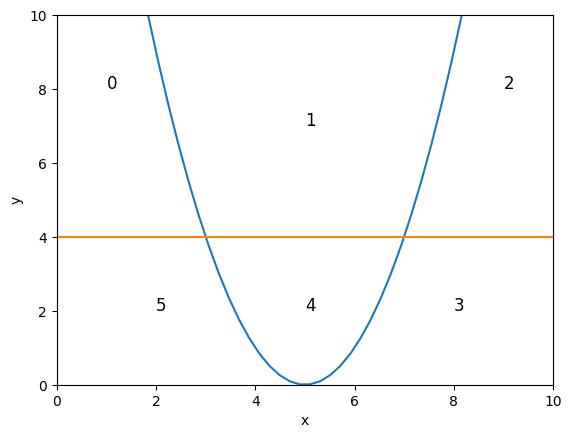

In [ ]:
plt.annotate('0', xy=(1, 8), fontsize=12)
plt.annotate('1', xy=(5, 7), fontsize=12)
plt.annotate('2', xy=(9, 8), fontsize=12)
plt.annotate('3', xy=(8, 2), fontsize=12)
plt.annotate('4', xy=(5, 2), fontsize=12)
plt.annotate('5', xy=(2, 2), fontsize=12)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')

x_range = np.linspace(0, 10, 50)
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(x_range, [np.square(x-5) for x in x_range])
plt.plot(x_range, [4 for x in x_range])


<font size=3>We would like to design a Multi Layer Perceptron - MLP neural network to classify points based on the region they belong to in the above graph.</font>

<u><b>Graph Description</b></u>
1. The blue curve is a parabola with repeated roots at x = 5
2. The orange line is y = 4

RUN Helper function 1 (sample_points): <font size=3><b>The below function generates the dataset.</b></font>

In [ ]:
def sample_points(n):
    '''
    parameters:
        n: number of samples

    return:
        samples: A numpy matrix of dimension nx3, where the first column represents x coordinates, the second column represents y coordinates, and the third column denotes the region label of each point
    '''

    np.random.seed(42)
    x1 = np.random.uniform(low=0,high=10,size=n).reshape(-1,1)
    x2 = np.random.uniform(low=0,high=10,size=n).reshape(-1,1)
    x = np.concatenate([x1,x2],axis=1)

    samples = []

    for x in x:
        if x[0] <= 5:
            if x[1] >= 4:
                if np.square(x[0]-5) >= x[1]:
                    y = 0
                    # print('0', x)
                    samples.append(np.hstack((x, [y])))
                else:
                    y = 1
                    # print('1', x)
                    samples.append(np.hstack((x, [y])))
            else:
                if np.square(x[0]-5) >= x[1]:
                    y = 5
                    # print('5', x)
                    samples.append(np.hstack((x, [y])))
                else:
                    y = 4
                    # print('4', x)
                    samples.append(np.hstack((x, [y])))
        else:
            if x[1] >= 4:
                if np.square(x[0]-5) >= x[1]:
                    y = 2
                    # print('2', x)
                    samples.append(np.hstack((x, [y])))
                else:
                    y = 1
                    # print('1', x)
                    samples.append(np.hstack((x, [y])))
            else:
                if np.square(x[0]-5) >= x[1]:
                    y = 3
                    # print('3', x)
                    samples.append(np.hstack((x, [y])))
                else:
                    y = 4
                    # print('4', x)
                    samples.append(np.hstack((x, [y])))

    return np.array(samples)

RUN Helper function 2 (encode_train_test): <font size=3><b>The function below encodes (one hot encoding) the dataset in to a form sutiable for training.</b></font>

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

train_ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
test_ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')

train_samples = sample_points(20000)
test_samples = sample_points(1000)

def encode_train_test(train_samples, test_samples):
    '''
    return:
        encoded_train: A numpy matrix of dimension 20000x8
        encoded_test: A numpy matrix of dimension 1000x8
    '''


    encoded_train = np.array(train_ct.fit_transform(train_samples))
    encoded_test = np.array(test_ct.fit_transform(test_samples))

    return encoded_train, encoded_test

### RUN THE CELL BELOW TO PLOT THE TRAIN AND TEST SAMPLES

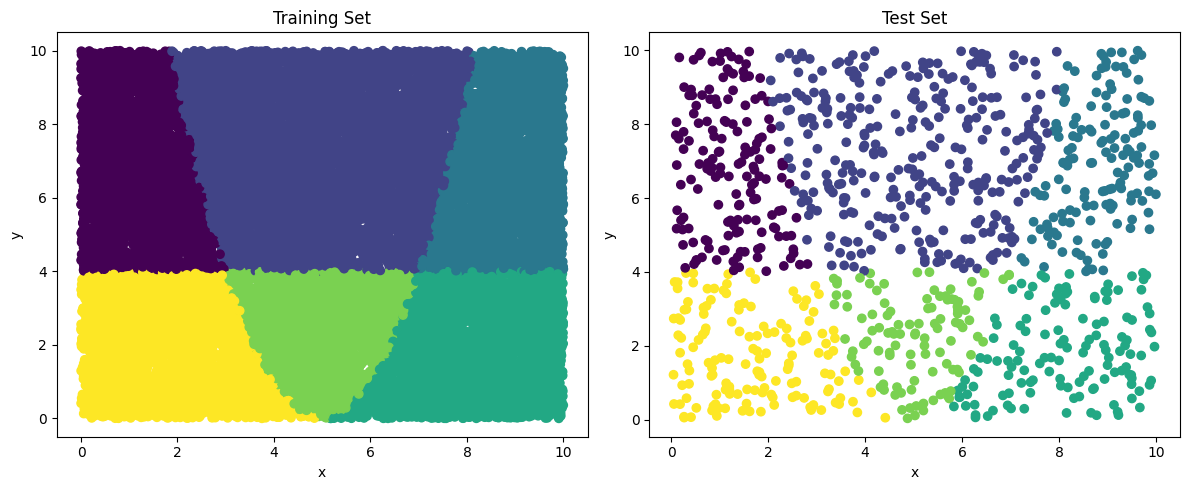

In [ ]:
def plot_data(train_x, train_y, train_c, test_x, test_y, test_c):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Training Set
    axs[0].set_title('Training Set')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].scatter(x=train_x, y=train_y, c=train_c)

    # Plot Test Set
    axs[1].set_title('Test Set')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].scatter(x=test_x, y=test_y, c=test_c)

    plt.tight_layout()


plot_data(train_x=train_samples[:, 0], train_y=train_samples[:, 1], train_c=train_samples[:, 2],
          test_x=test_samples[:, 0], test_y=test_samples[:, 1], test_c=test_samples[:, 2])

## <center><b>Questions</b></center>

<font size=3><b>Problem 1 (15 Points):</b> Build an MLP network with 8 neurons in the first hidden layer, 4 neurons each in the second and third hidden layers. Use 6 neurons for the output layer. All the hidden layer neurons use ReLU activation function. The output layer neurons use softmax activation function. The network should be compiled using Adam optimizer, categorical_crossentropy loss function and accuracy as a metric.</font>

In [ ]:

from tensorflow import keras
from tensorflow.keras.layers import Dense

def build_nn(input_dimension):
    '''
    Builds a compiled keras model according to the specified layer and neuron configuration.

    Parameters:
        input_dimension (int): The number of input features the model should accept.

    Return:
        model: A compiled keras model with the attributes provided in the question.
    '''

    # Initialize the Sequential model
    model = keras.Sequential()

    # Add the first hidden layer with 8 neurons and ReLU activation function
    model.add(Dense(8, activation='relu', input_shape=(input_dimension,)))

    # Add the second hidden layer with 4 neurons and ReLU activation function
    model.add(Dense(4, activation='relu'))

    # Add the third hidden layer with 4 neurons and ReLU activation function
    model.add(Dense(4, activation='relu'))

    # Add the output layer with 6 neurons (for 6 classes) using softmax activation function
    model.add(Dense(6, activation='softmax'))

    # Compile the model using Adam optimizer, categorical crossentropy loss, and accuracy as the metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

<font size=3><b>Problem 2 (15 Points):</b> Train the compiled network in problem 1 in 10 epochs, with a batch size of 32. Use the encoded training set for training (utilize Helper function 2).</font>

In [ ]:

import numpy as np

def train_model(model, encoded_train):
    '''
    parameters:
        model: A compiled keras model with the attributes provided in the problem 2

        encoded_train: The training dataset with 8 columns. The first 6 columns represent the one-hot-encoded region where the point belongs.
                       The last 2 columns represent the (x, y) co-ordinate of the point.

    return:
        model: A trained keras model with the provided settings in the question
        X_train: The encoded training X
        y_train: The encoded training y
    '''

    ### BEGIN SOLUTION

    # Split the encoded_train into X_train and y_train
    # Assuming that the last two columns are features (x, y coordinates)
    X_train = encoded_train[:, -2:]  # Selecting the last two columns for features
    y_train = encoded_train[:, :6]   # Selecting the first six columns for one-hot-encoded labels

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Return the model and the training sets
    return model, X_train, y_train

<font size=3><b>Problem 3 (5 Points):</b> Complete the function predict_point below that should predict the region of any given point (x, y). Your result must be decoded with a threshold of 0.3. </font>

In [ ]:
# make sure to leave this entire cell as a comments before you submit
# Example: for point (5, 2) with a threshold of 0.5
# encoded_train, encoded_test = encode_train_test(train_samples, test_samples)
# model = build_nn()
# model, X_train, y_train = train_model(model, encoded_train)
# example_encoded_region = np.where(trained_model.predict([[5, 2]])>0.5, 1, 0)

In [ ]:

import numpy as np

# Assuming `model` is your trained Keras model and `column_transformer` is defined elsewhere with an encoder
def predict_point(x, y):
    '''
    Predicts the region of a point based on its coordinates using a trained neural network model,
    applies a threshold to the prediction, and decodes it using a specified column transformer.

    Parameters:
        x (float): The x-coordinate of the point to be predicted.
        y (float): The y-coordinate of the point to be predicted.

    Returns:
        encoded_region (numpy array): A numpy array consisting of 1s and 0s representing the encoded form of the region the point is located.
        decoded_region (int): An integer representing the region the point is located.
    '''

    # Prepare input array for the model (reshaping to match the expected input shape of the model)
    input_features = np.array([[x, y]])

    # Predict the region using the model
    predictions = model.predict(input_features)

    # Apply threshold to the predictions to create a binary (one-hot-like) encoded output
    encoded_region = np.where(predictions > 0.3, 1, 0)

    # Use `argmax` to find the index of the most likely region after thresholding
    most_likely_region_index = np.argmax(encoded_region, axis=1)

    # Decode the one-hot encoded region to retrieve the original region label
    # The decoding assumes that the output of `argmax` can be mapped directly to the original classes
    decoded_region = column_transformer.named_transformers_['encoder'].inverse_transform(most_likely_region_index.reshape(-1, 1))[0, 0]

    return encoded_region[0], decoded_region

<font size=3><b>Problem 4 (15 Points):</b> Build an MLP network with all the settings of the network built in problem 5. Add dropout rates of 0.2, 0.2 and 0.1 in the first, second and third hidden layers of the network respectively.</font>

In [ ]:

from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

def build_dropout_nn():
    '''
    return:
        model: A compiled keras model with the attributes provided in the question
    '''

    # Don't modify
    model = keras.models.Sequential()

    ### BEGIN SOLUTION

    # Assuming the input dimension and other specifics (like number of output classes) are known or example values
    input_dimension = 10  # Example input feature size, replace with actual size
    num_classes = 3      # Example number of classes, replace with actual number of classes

    # Adding layers to the model
    # Adjusting to three hidden layers and setting specific dropout rates after each
    model.add(Dense(64, activation='relu', input_shape=(input_dimension,)))
    model.add(Dropout(0.2))  # Dropout rate of 20% after the first hidden layer

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))  # Dropout rate of 20% after the second hidden layer

    model.add(Dense(16, activation='relu'))  # Adding a third hidden layer
    model.add(Dropout(0.1))  # Dropout rate of 10% after the third hidden layer

    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model